## Task 1

In [5]:
import collections

# BFS algorithm
def bfs(graph, root):

    visited, queue = set(), collections.deque([root])
    visited.add(root)

    while queue:
        vertex = queue.popleft()
        print(str(vertex) + " ", end="")

        
        for neighbour in graph[vertex]:
            if neighbour not in visited:
                visited.add(neighbour)
                queue.append(neighbour)


if __name__ == '__main__':
    graph = {0: [2,4,5], 1: [4,5], 2: [0], 4: [1, 0], 5 : [1,0]}
    print("Following is Breadth First Traversal: ")
    bfs(graph, 0)


Following is Breadth First Traversal: 
0 2 4 5 1 

In [7]:

def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)

    print(start)

    for next in graph[start] - visited:
        dfs(graph, next, visited)
    return visited


graph = {'0': set(['2', '4','5']),
         '1': set(['4','5']),
         '2': set(['0']),
         '4': set(['1','0']),
         '5': set(['0', '1'])}

print('DFS: ')
dfs(graph, '2')

DFS: 
2
0
5
1
4
4


{'0', '1', '2', '4', '5'}

## Task 2

In [47]:
import random as r
n= 10000
l = []
for i in range(n):
    c = True
    while(c):
        x = r.randint(0,n*100000)
        if x in l:
            continue
        else:
            l.append(x)
            c = False

In [48]:
class Node:
    def __init__(self, val=None):
        self.left = None
        self.right = None
        self.val = val

class BST:
    def __init__(self):
        self.root = None

    def insert(self, val):
        if self.root is None:
            self.root = Node(val)
        else:
            self._insert(val, self.root)

    def _insert(self, val, curr_node):
        if val < curr_node.val:
            if curr_node.left is None:
                curr_node.left = Node(val)
            else:
                self._insert(val, curr_node.left)
        elif val > curr_node.val:
            if curr_node.right is None:
                curr_node.right = Node(val)
            else:
                self._insert(val, curr_node.right)
        else:
            print("Value already in tree.")
def generate_bst(lst):
    bst = BST()
    for val in lst:
        bst.insert(val)
    return bst
tree = generate_bst(l)

In [49]:
## DFS

def dfs(root, goal):
    print(root.val)
    if root.val == goal:
        return
    if root.left is not None:
        return dfs(root.left,goal)
    if root.right is not None:
        return dfs(root.right,goal)

In [91]:
import time

start = time.time()

root = tree.root
goal = l[n-220]
dfs(root,goal)
end = time.time()
print('Time taken by DFS:',end='')
print(end - start,end= ' ')
print('s')

280046820
93436864
92880774
85122738
42732895
36731030
16628584
14869678
13551327
2526618
2067764
235325
113971
21907
Time taken by DFS:0.008022069931030273 s


In [92]:
from collections import deque
def bfs(root,goal):
        if root is None:
            return []
        queue = deque([root])
        result = []
        while queue:
            node = queue.popleft()
            if node.val == goal:
                return 
            result.append(node.val)
            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)
        return result

In [94]:
start = time.time()

root = tree.root
goal = l[n-220]
bfs(root,goal)
end = time.time()
print('Time taken by BFS:',end='')
print(end - start,end= ' ')
print('s')

Time taken by BFS:0.008015871047973633 s


## Task 3

In [95]:
from binarytree import Node

In [96]:
root = Node(14)
root.left = Node(10)
root.right = Node(55)
root.left.left = Node(9)
root.left.right = Node(12)
root.right.left = Node(29)
root.right.right = Node(99)
root.right.left.left = Node(15)
root.right.left.right = Node(53)
root.right.left.left.right = Node(24)
root.right.right = Node(99)
root.right.right.left = Node(88)
root.right.right.left.left = Node(61)
root.right.right.left.right = Node(98)
root.right.right.left.left.right = Node(85)
root.right.right.left.right.left = Node(90)
print(root)


    ____14____________
   /                  \
  10               ____55_______________
 /  \             /                     \
9    12      ____29               _______99
            /      \             /
           15       53      ____88___
             \             /         \
              24          61         _98
                            \       /
                             85    90



In [103]:
from anytree import Node, RenderTree

In [99]:
a = Node(14)
b = Node(10,parent=a)
c = Node(55,parent=a)
d = Node(9,b)
e = Node(12,b)
f = Node(29,c)
g = Node(99,c)
h = Node(15,f)
i = Node(53,f)
j = Node(88,g)
k = Node(24,h)
l = Node(61,j)
m = Node(98,j)
n = Node(85,l)
o = Node(90,m)
print('Node representation: ',m)

Node representation:  Node('/14/55/99/88/98')


In [100]:
for pre, fill, node in RenderTree(a):
    print("%s%s" % (pre, node.name))

14
├── 10
│   ├── 9
│   └── 12
└── 55
    ├── 29
    │   ├── 15
    │   │   └── 24
    │   └── 53
    └── 99
        └── 88
            ├── 61
            │   └── 85
            └── 98
                └── 90


In [104]:
from treelib import Node, Tree

In [105]:
tree = Tree()
tree.create_node(14,'a')
tree.create_node(10,'b','a')
tree.create_node(55,'c','a')
tree.create_node(9,'d','b')
tree.create_node(12,'e','b')
tree.show()

14
├── 10
│   ├── 9
│   └── 12
└── 55



## Task 4

In [106]:
import heapq


def ucs(graph, start, goal):
    # Keep track of visited nodes, their costs, and their parents
    visited = {start: (0, None)}
    # Use a priority queue to store nodes with the smallest cost first
    frontier = [(0, start)]
    while frontier:
        # Pop the node with the smallest cost so far
        (cost, current) = heapq.heappop(frontier)
        # If we've reached the goal, construct and return the path
        if current == goal:
            path = []
            while current is not None:
                path.append(current)
                current = visited[current][1]
            path.reverse()
            return (cost, path)
        # Otherwise, add neighbors to the frontier if we haven't seen them before
        for neighbor, neighbor_cost in graph[current].items():
            new_cost = visited[current][0] + neighbor_cost
            if neighbor not in visited or new_cost < visited[neighbor][0]:
                visited[neighbor] = (new_cost, current)
                heapq.heappush(frontier, (new_cost, neighbor))
    # If we've explored the entire graph and haven't found the goal, return infinity and an empty path
    return (float('inf'), [])



In [107]:
graph = {'A': {'B': 2, 'C': 3},
         'B': {'A': 2, 'C': 1},
         'C': {'A': 3, 'B': 1, 'D': 4},
         'D': {'C': 4}}


In [108]:
ucs(graph,'A','D')

(7, ['A', 'C', 'D'])

In [109]:
def build_dcitt(lis): 
    return {i[0] :i[1] for i in lis }

In [110]:
## from task 1
graph = {0: [(2,1),(4,3),(5,4)], 1: [(4,2),(5,4)], 2: [(0,1)], 4: [(1,2), (0,3)], 5 : [(1,4),(0,5)]}
gd = {}
for i in graph.keys():
    gd.update({i:build_dcitt(graph.get(i))})
gd

{0: {2: 1, 4: 3, 5: 4},
 1: {4: 2, 5: 4},
 2: {0: 1},
 4: {1: 2, 0: 3},
 5: {1: 4, 0: 5}}

In [111]:
mp = {
    'Arad': {'Zerind': 75, 'Sibiu': 140, 'Timisoara': 118},
    'Zerind': {'Arad': 75, 'Oradea': 71},
    'Oradea': {'Zerind': 71, 'Sibiu': 151},
    'Sibiu': {'Arad': 140, 'Oradea': 151, 'Fagaras': 99, 'Rimnicu Vilcea': 80},
    'Fagaras': {'Sibiu': 99, 'Bucharest': 211},
    'Rimnicu Vilcea': {'Sibiu': 80, 'Pitesti': 97, 'Craiova': 146},
    'Timisoara': {'Arad': 118, 'Lugoj': 111},
    'Lugoj': {'Timisoara': 111, 'Mehadia': 70},
    'Mehadia': {'Lugoj': 70, 'Drobeta': 75},
    'Drobeta': {'Mehadia': 75, 'Craiova': 120},
    'Craiova': {'Drobeta': 120, 'Rimnicu Vilcea': 146, 'Pitesti': 138},
    'Pitesti': {'Rimnicu Vilcea': 97, 'Craiova': 138, 'Bucharest': 101},
    'Bucharest': {'Pitesti': 101, 'Fagaras': 211, 'Giurgiu': 90, 'Urziceni': 85},
    'Giurgiu': {'Bucharest': 90},
    'Urziceni': {'Bucharest': 85, 'Hirsova': 98, 'Vaslui': 142},
    'Hirsova': {'Urziceni': 98, 'Eforie': 86},
    'Eforie': {'Hirsova': 86},
    'Vaslui': {'Urziceni': 142, 'Iasi': 92},
    'Iasi': {'Vaslui': 92, 'Neamt': 87},
    'Neamt': {'Iasi': 87}
}

# Find the optimal path and cost from Arad to Bucharest
start = 'Arad'
goal = 'Bucharest'
cost, path = ucs(mp, start, goal)

print("Cost:",cost)
print(f"Path: {' -> '.join(path)}")


Cost: 418
Path: Arad -> Sibiu -> Rimnicu Vilcea -> Pitesti -> Bucharest


## Task 5

In [22]:
!pip install networkx[default]

In [112]:
graph = {0: [(2,1),(4,3),(5,4)], 1: [(4,2),(5,4)], 2: [(0,1)], 4: [(1,2), (0,3)], 5 : [(1,4),(0,5)]}
import networkx as nx
import matplotlib.pyplot as plt

# Create a networkx graph from the adjacency matrix
G = nx.Graph(graph)

# Draw the graph using a circular layout
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the graph
plt.show()

TypeError: '_AxesStack' object is not callable

<Figure size 432x288 with 0 Axes>

In [139]:
graph = {'A': {'B': 2, 'C': 3},
         'B': {'A': 2, 'C': 1},
         'C': {'A': 3, 'B': 1, 'D': 4},
         'D': {'C': 4}}
mp.get('Arad').keys()
mp.get('Arad')[]

{'Zerind': 75, 'Sibiu': 140, 'Timisoara': 118}

In [166]:
mp
ed = []
for i in mp.keys():
    for j in mp.get(i).keys():
        t = (i[0],j[0],mp.get(i)[j])
        ed.append(t)


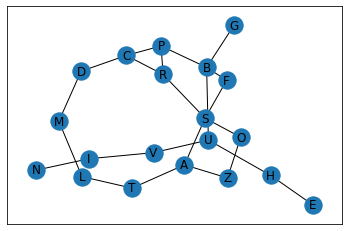

In [170]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_weighted_edges_from(ed)


nx.draw_networkx(G,with_labels=1)
plt.show()

In [171]:
graph = {'A': {'B': 2, 'C': 3},
         'B': {'A': 2, 'C': 1},
         'C': {'A': 3, 'B': 1, 'D': 4},
         'D': {'C': 44
    }}

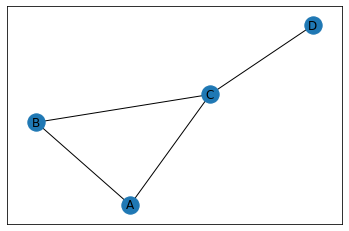

In [175]:
eg = []

for i in graph.keys():
    for j in graph.get(i):
        t = (i,j,graph.get(i)[j])
        eg.append(t)
G1 = nx.Graph()
G1.add_weighted_edges_from(eg)


nx.draw_networkx(G1,with_labels=1)
plt.show()

In [60]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [50]:
x = [i for i in mp.keys()]
graph = mp
graph.get('Arad')['Zerind']

75

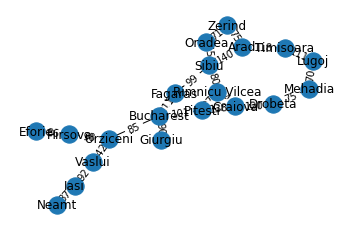

In [76]:
import networkx as nx
import matplotlib.pyplot as plt

# create a graph
G = nx.Graph()

# add nodes to the graph
G.add_nodes_from(x)


for i in graph.keys():
    for j in graph.get(i).keys():
        G.add_edge(i,j,weight=graph.get(i)[j])
# # add weighted edges to the graph
# G.add_edge(1, 2, weight=0.5)
# G.add_edge(1, 3, weight=0.3)
# G.add_edge(2, 4, weight=1.2)
# G.add_edge(3, 4, weight=0.7)
# G.add_edge(4, 5, weight=2.0)

# define positions of nodes
pos = nx.spring_layout(G)

# get edge weights
edge_labels = nx.get_edge_attributes(G, "weight")

# draw the graph
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw_networkx_labels(G, pos)
plt.axis("off")
%matplotlib inline
# show the graph
plt.show()


## Task 6

In [118]:
from queue import Queue

def is_valid(state):
    for i in range(len(state)):
        for j in range(i+1, len(state)):
            if state[i] == state[j] or abs(state[i]-state[j]) == j-i:
                return False
    return True

def n_queens_bfs(n):
    q = Queue()
    q.put([])
    while not q.empty():
        state = q.get()
        if len(state) == n:
            if is_valid(state):
                return state
        else:
            for i in range(n):
                new_state = state + [i]
                if is_valid(new_state):
                    q.put(new_state)

print('Row position of queen in each column:', end = ' ')
print(n_queens_bfs(8)) 


Row position of queen in each column: [0, 4, 7, 5, 2, 6, 1, 3]
